# radius

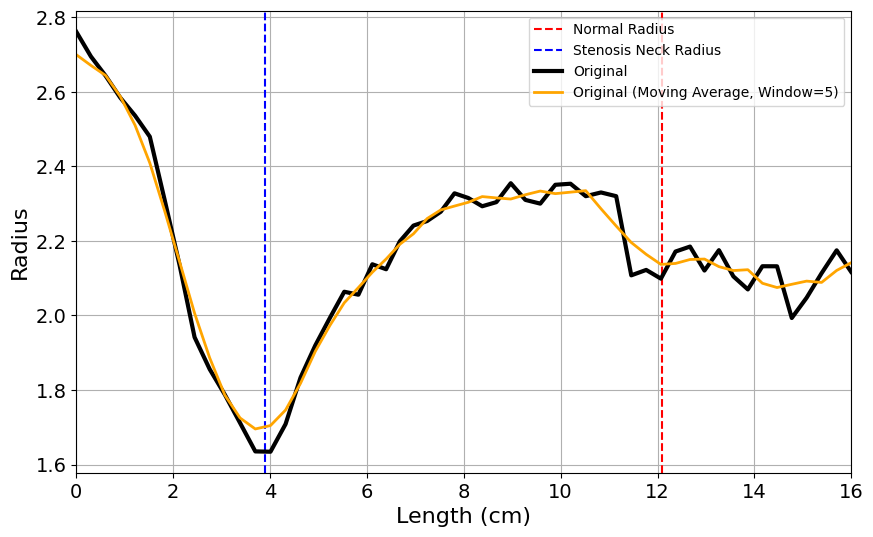

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'centerline_comparsion.xlsx'  # Replace with your file path
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Extract CB0 radius and length data
cb0_radius = data['radius_0']
cb0_length = data['length_0']

# Apply moving average smoothing (once) and handle edge cases
window_size = 5  # Define the moving average window size
cb0_radius_smoothed = cb0_radius.rolling(window=window_size, center=True, min_periods=1).mean()

# Plot the original data and smoothed data on the same figure
plt.figure(figsize=(10, 6))

plt.axvline(x=12.1, color='red', linestyle='--', linewidth=1.5, label='Normal Radius')
plt.axvline(x=3.9, color='blue', linestyle='--', linewidth=1.5, label='Stenosis Neck Radius')
plt.plot(cb0_length, cb0_radius, color='black', linewidth=3, label='Original')
plt.plot(cb0_length, cb0_radius_smoothed, color='orange', linewidth=2, label=f'Original (Moving Average, Window={window_size})')
#plt.title('CB0 Radius: Original and Smoothed Data', fontsize=14)
plt.xlabel('Length (cm)', fontsize=16)
plt.ylabel('Radius', fontsize=16)
plt.xlim(0, 16)  # Limit x-axis range
plt.legend(fontsize=10, loc='upper right')
plt.tick_params(axis='both', labelsize=14) 
plt.grid(True)
plt.show()


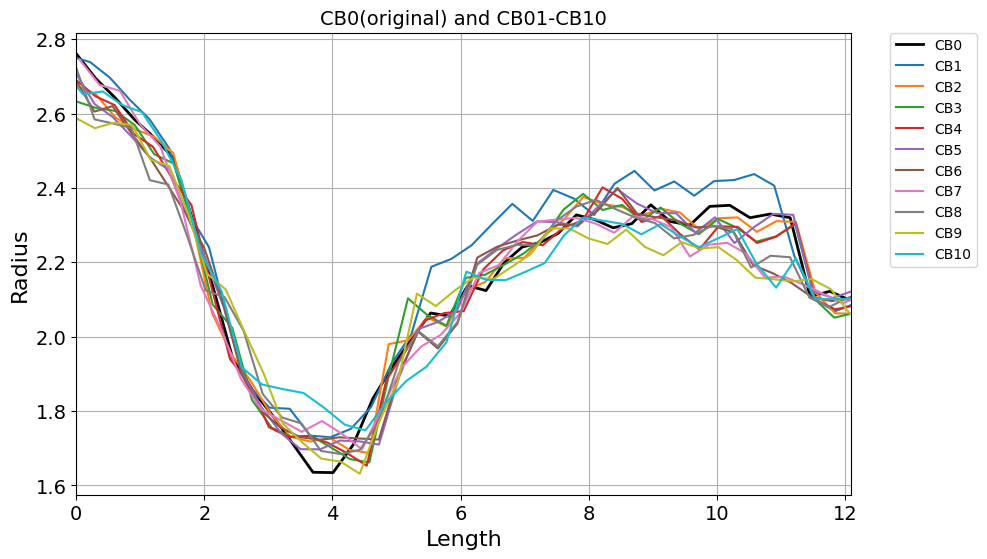

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
latest_excel_file_path = 'centerline_comparsion.xlsx'  # Replace with your file path
latest_sheet_data = pd.read_excel(latest_excel_file_path, sheet_name='Sheet1')

# Define reference data (CB0)
reference_radius = latest_sheet_data['radius_0']
reference_length = latest_sheet_data['length_0']

# Offsets for length adjustment
offsets = {
    "radius_1": 0,  # CB0 is fixed
    "radius_1": -0.4,  # Offset for CB1
    "radius_2": 0,  # Offset for CB2
    "radius_3": 0,  # Offset for CB3
    "radius_4": 0,  # Offset for CB4
    "radius_5": 0,  # Offset for CB5
    "radius_6": 0,  # Offset for CB6
    "radius_7": 0.05,  # Offset for CB7
    "radius_8": 0,  # Offset for CB8
    "radius_9": 0,  # Offset for CB9
    "radius_10": -0.2,  # Offset for CB10
}

# Plot CB0 as the reference
plt.figure(figsize=(10, 6))
plt.plot(reference_length, reference_radius, label='CB0', color='black', linewidth=2)

# Uncomment the following blocks one by one to align models

# # Plot CB1
col_cb1 = 'radius_1'
length_cb1 = 'length_1'
if col_cb1 in latest_sheet_data.columns and length_cb1 in latest_sheet_data.columns:
    adjusted_length_cb1 = latest_sheet_data[length_cb1] + offsets[col_cb1]
    plt.plot(adjusted_length_cb1, latest_sheet_data[col_cb1], label='CB1')

# # Plot CB2
col_cb2 = 'radius_2'
length_cb2 = 'length_2'
if col_cb2 in latest_sheet_data.columns and length_cb2 in latest_sheet_data.columns:
    adjusted_length_cb2 = latest_sheet_data[length_cb2] + offsets[col_cb2]
    plt.plot(adjusted_length_cb2, latest_sheet_data[col_cb2], label='CB2')

# # Plot CB3
col_cb3 = 'radius_3'
length_cb3 = 'length_3'
if col_cb3 in latest_sheet_data.columns and length_cb3 in latest_sheet_data.columns:
    adjusted_length_cb3 = latest_sheet_data[length_cb3] + offsets[col_cb3]
    plt.plot(adjusted_length_cb3, latest_sheet_data[col_cb3], label='CB3')

# # Plot CB4
col_cb4 = 'radius_4'
length_cb4 = 'length_4'
if col_cb4 in latest_sheet_data.columns and length_cb4 in latest_sheet_data.columns:
    adjusted_length_cb4 = latest_sheet_data[length_cb4] + offsets[col_cb4]
    plt.plot(adjusted_length_cb4, latest_sheet_data[col_cb4], label='CB4')

# # Plot CB5
col_cb5 = 'radius_5'
length_cb5 = 'length_5'
if col_cb5 in latest_sheet_data.columns and length_cb5 in latest_sheet_data.columns:
    adjusted_length_cb5 = latest_sheet_data[length_cb5] + offsets[col_cb5]
    plt.plot(adjusted_length_cb5, latest_sheet_data[col_cb5], label='CB5')

# # Plot CB6
col_cb6 = 'radius_6'
length_cb6 = 'length_6'
if col_cb6 in latest_sheet_data.columns and length_cb6 in latest_sheet_data.columns:
    adjusted_length_cb6 = latest_sheet_data[length_cb6] + offsets[col_cb6]
    plt.plot(adjusted_length_cb6, latest_sheet_data[col_cb6], label='CB6')

# # Plot CB7
col_cb7 = 'radius_7'
length_cb7 = 'length_7'
if col_cb7 in latest_sheet_data.columns and length_cb7 in latest_sheet_data.columns:
    adjusted_length_cb7 = latest_sheet_data[length_cb7] + offsets[col_cb7]
    plt.plot(adjusted_length_cb7, latest_sheet_data[col_cb7], label='CB7')

# # Plot CB8
col_cb8 = 'radius_8'
length_cb8 = 'length_8'
if col_cb8 in latest_sheet_data.columns and length_cb8 in latest_sheet_data.columns:
    adjusted_length_cb8 = latest_sheet_data[length_cb8] + offsets[col_cb8]
    plt.plot(adjusted_length_cb8, latest_sheet_data[col_cb8], label='CB8')

# # Plot CB9
col_cb9 = 'radius_9'
length_cb9 = 'length_9'
if col_cb9 in latest_sheet_data.columns and length_cb9 in latest_sheet_data.columns:
    adjusted_length_cb9 = latest_sheet_data[length_cb9] + offsets[col_cb9]
    plt.plot(adjusted_length_cb9, latest_sheet_data[col_cb9], label='CB9')

# # Plot CB10
col_cb10 = 'radius_10'
length_cb10 = 'length_10'
if col_cb10 in latest_sheet_data.columns and length_cb10 in latest_sheet_data.columns:
    adjusted_length_cb10 = latest_sheet_data[length_cb10] + offsets[col_cb10]
    plt.plot(adjusted_length_cb10, latest_sheet_data[col_cb10], label='CB10')

plt.title('CB0(original) and CB01-CB10', fontsize=14)
plt.xlabel('Length', fontsize=16)
plt.xlim(0, 12.1) 
plt.ylabel('Radius', fontsize=16)
plt.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tick_params(axis='both', labelsize=14) 
plt.grid(True)
plt.show()


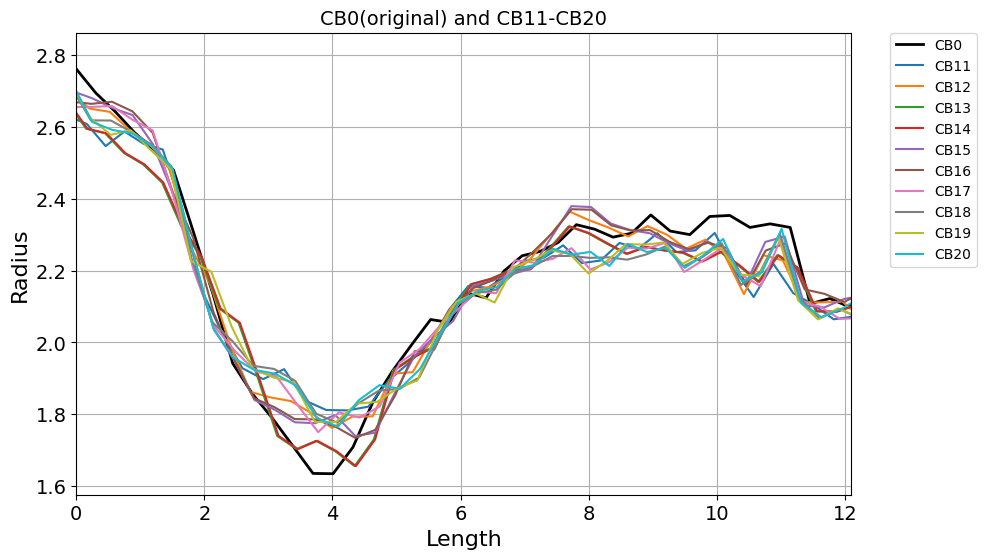

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
latest_excel_file_path = 'centerline_comparsion.xlsx'  # Replace with your file path
latest_sheet_data = pd.read_excel(latest_excel_file_path, sheet_name='Sheet1')

# Define reference data (CB0)
reference_radius = latest_sheet_data['radius_0']
reference_length = latest_sheet_data['length_0']

# Offsets for length adjustment
offsets = {
    "radius_0": 0,  # CB0 is fixed
    "radius_11": -0.42,  # Offset for CB11
    "radius_12": -0.42,  # Offset for CB12
    "radius_13": -0.44,  # Offset for CB13
    "radius_14": -0.42,  # Offset for CB14
    "radius_15": -0.4,  # Offset for CB15
    "radius_16": -0.4,  # Offset for CB16
    "radius_17": -0.4,  # Offset for CB17
    "radius_18": -0.4,  # Offset for CB18
    "radius_19": -0.4,  # Offset for CB19
    "radius_20": -0.38,  # Offset for CB20
}

# Plot CB0 as the reference
plt.figure(figsize=(10, 6))
plt.plot(reference_length, reference_radius, label='CB0', color='black', linewidth=2)

# Uncomment the following blocks one by one to align models

# # Plot CB11
col_cb11 = 'radius_11'
length_cb11 = 'length_11'
if col_cb11 in latest_sheet_data.columns and length_cb11 in latest_sheet_data.columns:
    adjusted_length_cb11 = latest_sheet_data[length_cb11] + offsets[col_cb11]
    plt.plot(adjusted_length_cb11, latest_sheet_data[col_cb11], label='CB11')

# # Plot CB12
col_cb12 = 'radius_12'
length_cb12 = 'length_12'
if col_cb12 in latest_sheet_data.columns and length_cb12 in latest_sheet_data.columns:
    adjusted_length_cb12 = latest_sheet_data[length_cb12] + offsets[col_cb12]
    plt.plot(adjusted_length_cb12, latest_sheet_data[col_cb12], label='CB12')

# # Plot CB13
col_cb13 = 'radius_13'
length_cb13 = 'length_13'
if col_cb13 in latest_sheet_data.columns and length_cb13 in latest_sheet_data.columns:
    adjusted_length_cb13 = latest_sheet_data[length_cb13] + offsets[col_cb13]
    plt.plot(adjusted_length_cb13, latest_sheet_data[col_cb13], label='CB13')

# # Plot CB14
col_cb14 = 'radius_14'
length_cb14 = 'length_14'
if col_cb14 in latest_sheet_data.columns and length_cb14 in latest_sheet_data.columns:
    adjusted_length_cb14 = latest_sheet_data[length_cb14] + offsets[col_cb14]
    plt.plot(adjusted_length_cb14, latest_sheet_data[col_cb14], label='CB14')

# # Plot CB15
col_cb15 = 'radius_15'
length_cb15 = 'length_15'
if col_cb15 in latest_sheet_data.columns and length_cb15 in latest_sheet_data.columns:
    adjusted_length_cb15 = latest_sheet_data[length_cb15] + offsets[col_cb15]
    plt.plot(adjusted_length_cb15, latest_sheet_data[col_cb15], label='CB15')

# # Plot CB16
col_cb16 = 'radius_16'
length_cb16 = 'length_16'
if col_cb16 in latest_sheet_data.columns and length_cb16 in latest_sheet_data.columns:
    adjusted_length_cb16 = latest_sheet_data[length_cb16] + offsets[col_cb16]
    plt.plot(adjusted_length_cb16, latest_sheet_data[col_cb16], label='CB16')

# # Plot CB17
col_cb17 = 'radius_17'
length_cb17 = 'length_17'
if col_cb17 in latest_sheet_data.columns and length_cb17 in latest_sheet_data.columns:
    adjusted_length_cb17 = latest_sheet_data[length_cb17] + offsets[col_cb17]
    plt.plot(adjusted_length_cb17, latest_sheet_data[col_cb17], label='CB17')

# # Plot CB18
col_cb18 = 'radius_18'
length_cb18 = 'length_18'
if col_cb18 in latest_sheet_data.columns and length_cb18 in latest_sheet_data.columns:
    adjusted_length_cb18 = latest_sheet_data[length_cb18] + offsets[col_cb18]
    plt.plot(adjusted_length_cb18, latest_sheet_data[col_cb18], label='CB18')

# # Plot CB19
col_cb19 = 'radius_19'
length_cb19 = 'length_19'
if col_cb19 in latest_sheet_data.columns and length_cb19 in latest_sheet_data.columns:
    adjusted_length_cb19 = latest_sheet_data[length_cb19] + offsets[col_cb19]
    plt.plot(adjusted_length_cb19, latest_sheet_data[col_cb19], label='CB19')

# # Plot CB20
col_cb20 = 'radius_20'
length_cb20 = 'length_20'
if col_cb20 in latest_sheet_data.columns and length_cb20 in latest_sheet_data.columns:
    adjusted_length_cb20 = latest_sheet_data[length_cb20] + offsets[col_cb20]
    plt.plot(adjusted_length_cb20, latest_sheet_data[col_cb20], label='CB20')

plt.title('CB0(original) and CB11-CB20', fontsize=14)
plt.xlabel('Length', fontsize=16)
plt.xlim(0, 12.1) 
plt.ylabel('Radius', fontsize=16)
plt.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tick_params(axis='both', labelsize=14) 
plt.grid(True)
plt.show()


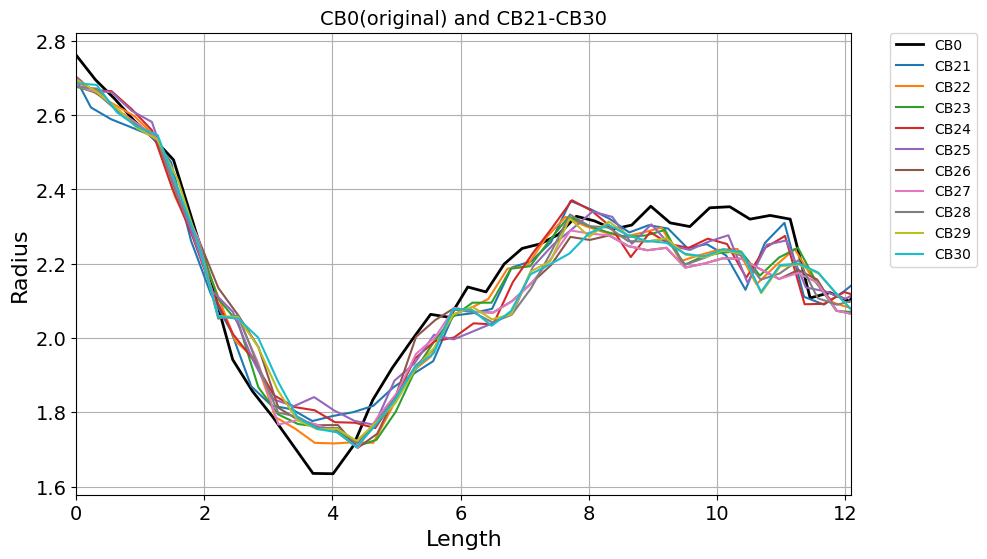

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
latest_excel_file_path = 'centerline_comparsion.xlsx'  # Replace with your file path
latest_sheet_data = pd.read_excel(latest_excel_file_path, sheet_name='Sheet1')

# Define reference data (CB0)
reference_radius = latest_sheet_data['radius_0']
reference_length = latest_sheet_data['length_0']

# Offsets for length adjustment
offsets = {
    "radius_0": 0,  # CB0 is fixed
    "radius_21": -0.4,  # Offset for CB21
    "radius_22": -0.05,  # Offset for CB22
    "radius_23": 0,  # Offset for CB23
    "radius_24": -0.4,  # Offset for CB24
    "radius_25": -0.4,  # Offset for CB25
    "radius_26": 0,  # Offset for CB26
    "radius_27": 0,  # Offset for CB27
    "radius_28": 0,  # Offset for CB28
    "radius_29": 0,  # Offset for CB29
    "radius_30": 0,  # Offset for CB30
}

# Plot CB0 as the reference
plt.figure(figsize=(10, 6))
plt.plot(reference_length, reference_radius, label='CB0', color='black', linewidth=2)

# Uncomment the following blocks one by one to align models

# # Plot CB21
col_cb21 = 'radius_21'
length_cb21 = 'length_21'
if col_cb21 in latest_sheet_data.columns and length_cb21 in latest_sheet_data.columns:
    adjusted_length_cb21 = latest_sheet_data[length_cb21] + offsets[col_cb21]
    plt.plot(adjusted_length_cb21, latest_sheet_data[col_cb21], label='CB21')

# # Plot CB22
col_cb22 = 'radius_22'
length_cb22 = 'length_22'
if col_cb22 in latest_sheet_data.columns and length_cb22 in latest_sheet_data.columns:
    adjusted_length_cb22 = latest_sheet_data[length_cb22] + offsets[col_cb22]
    plt.plot(adjusted_length_cb22, latest_sheet_data[col_cb22], label='CB22')

# # Plot CB23
col_cb23 = 'radius_23'
length_cb23 = 'length_23'
if col_cb23 in latest_sheet_data.columns and length_cb23 in latest_sheet_data.columns:
    adjusted_length_cb23 = latest_sheet_data[length_cb23] + offsets[col_cb23]
    plt.plot(adjusted_length_cb23, latest_sheet_data[col_cb23], label='CB23')

# # Plot CB24
col_cb24 = 'radius_24'
length_cb24 = 'length_24'
if col_cb24 in latest_sheet_data.columns and length_cb24 in latest_sheet_data.columns:
    adjusted_length_cb24 = latest_sheet_data[length_cb24] + offsets[col_cb24]
    plt.plot(adjusted_length_cb24, latest_sheet_data[col_cb24], label='CB24')

# # Plot CB25
col_cb25 = 'radius_25'
length_cb25 = 'length_25'
if col_cb25 in latest_sheet_data.columns and length_cb25 in latest_sheet_data.columns:
    adjusted_length_cb25 = latest_sheet_data[length_cb25] + offsets[col_cb25]
    plt.plot(adjusted_length_cb25, latest_sheet_data[col_cb25], label='CB25')

# # Plot CB26
col_cb26 = 'radius_26'
length_cb26 = 'length_26'
if col_cb26 in latest_sheet_data.columns and length_cb26 in latest_sheet_data.columns:
    adjusted_length_cb26 = latest_sheet_data[length_cb26] + offsets[col_cb26]
    plt.plot(adjusted_length_cb26, latest_sheet_data[col_cb26], label='CB26')

# # Plot CB27
col_cb27 = 'radius_27'
length_cb27 = 'length_27'
if col_cb27 in latest_sheet_data.columns and length_cb27 in latest_sheet_data.columns:
    adjusted_length_cb27 = latest_sheet_data[length_cb27] + offsets[col_cb27]
    plt.plot(adjusted_length_cb27, latest_sheet_data[col_cb27], label='CB27')

# # Plot CB28
col_cb28 = 'radius_28'
length_cb28 = 'length_28'
if col_cb28 in latest_sheet_data.columns and length_cb28 in latest_sheet_data.columns:
    adjusted_length_cb28 = latest_sheet_data[length_cb28] + offsets[col_cb28]
    plt.plot(adjusted_length_cb28, latest_sheet_data[col_cb28], label='CB28')

# # Plot CB29
col_cb29 = 'radius_29'
length_cb29 = 'length_29'
if col_cb29 in latest_sheet_data.columns and length_cb29 in latest_sheet_data.columns:
    adjusted_length_cb29 = latest_sheet_data[length_cb29] + offsets[col_cb29]
    plt.plot(adjusted_length_cb29, latest_sheet_data[col_cb29], label='CB29')

# # Plot CB30
col_cb30 = 'radius_30'
length_cb30 = 'length_30'
if col_cb30 in latest_sheet_data.columns and length_cb30 in latest_sheet_data.columns:
    adjusted_length_cb30 = latest_sheet_data[length_cb30] + offsets[col_cb30]
    plt.plot(adjusted_length_cb30, latest_sheet_data[col_cb30], label='CB30')

plt.title('CB0(original) and CB21-CB30', fontsize=14)
plt.xlabel('Length', fontsize=16)
plt.xlim(0, 12.1) 
plt.ylabel('Radius', fontsize=16)
plt.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tick_params(axis='both', labelsize=14) 
plt.grid(True)
plt.show()



# RMS

In [78]:
import numpy as np

# 定义长度范围和插值点
length_range = np.linspace(0, 12.1, 500)  # 在 0 到 12.1 范围内插值 500 个点

# 对 CB0 进行插值
cb0_interpolated = np.interp(length_range, reference_length, reference_radius)

# 存储 RMS 结果
rms_results = {}

# 对 CB1 到 CB30 进行插值并计算 RMS
for i in range(1, 31):  # CB1 到 CB30
    col = f'radius_{i}'
    length_col = f'length_{i}'
    if col in latest_sheet_data.columns and length_col in latest_sheet_data.columns:
        # 获取调整后的长度
        adjusted_length = latest_sheet_data[length_col] + offsets.get(col, 0)  # 默认为 0 偏移
        # 获取模型的半径
        radius_data = latest_sheet_data[col]
        # 插值模型数据
        interpolated_radius = np.interp(length_range, adjusted_length, radius_data)
        # 计算 RMS
        rms = np.sqrt(np.mean((interpolated_radius - cb0_interpolated) ** 2))
        rms_results[col] = rms

# 打印 RMS 结果
print("RMS Results (Compared to CB0):")
for model, rms in rms_results.items():
    print(f"{model}: {rms:.4f}")


RMS Results (Compared to CB0):
radius_1: 0.1140
radius_2: 0.0383
radius_3: 0.0482
radius_4: 0.0453
radius_5: 0.0489
radius_6: 0.0649
radius_7: 0.0672
radius_8: 0.0652
radius_9: 0.0795
radius_10: 0.0949
radius_11: 0.1106
radius_12: 0.1033
radius_13: 0.1109
radius_14: 0.1109
radius_15: 0.0971
radius_16: 0.1032
radius_17: 0.1069
radius_18: 0.1165
radius_19: 0.1180
radius_20: 0.1084
radius_21: 0.0705
radius_22: 0.0676
radius_23: 0.0715
radius_24: 0.0747
radius_25: 0.0799
radius_26: 0.0854
radius_27: 0.0807
radius_28: 0.0813
radius_29: 0.0829
radius_30: 0.0859


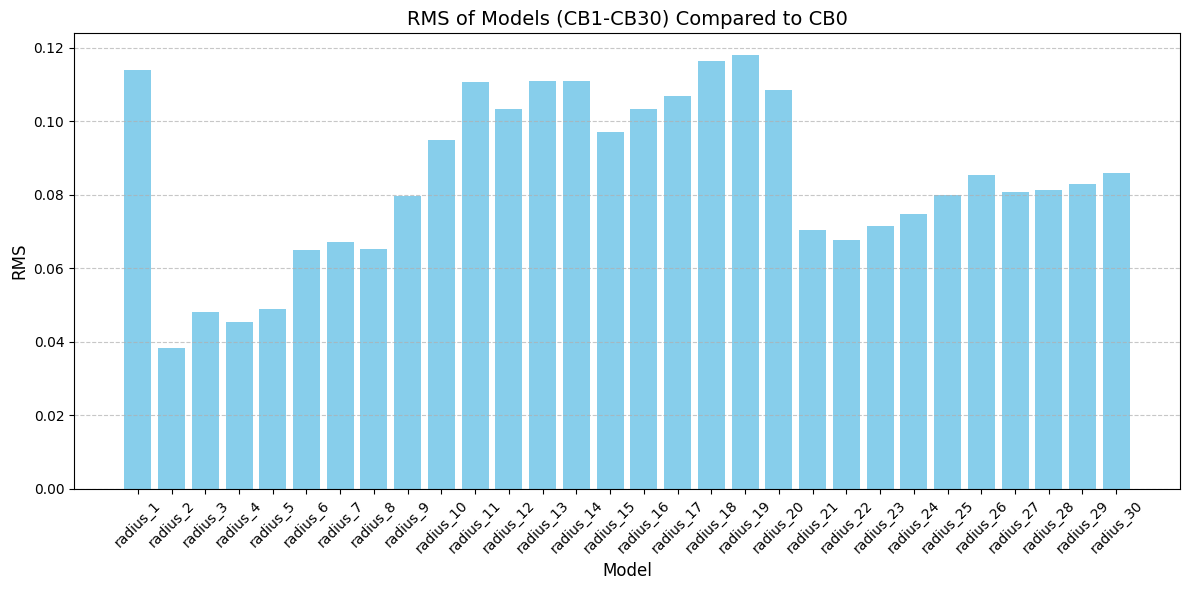

In [79]:
# 绘制 RMS 结果的条形图
import matplotlib.pyplot as plt

models = list(rms_results.keys())
rms_values = list(rms_results.values())

plt.figure(figsize=(12, 6))
plt.bar(models, rms_values, color='skyblue')
plt.title('RMS of Models (CB1-CB30) Compared to CB0', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('RMS', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Curvature and Torsion

C:\Users\Harujane\AppData\Local\Temp\ipykernel_26992\2385339568.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  curvature_colors = cm.get_cmap('tab20', len(curvature_columns))  # Adjust the number of colors
C:\Users\Harujane\AppData\Local\Temp\ipykernel_26992\2385339568.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  torsion_colors = cm.get_cmap('tab20', len(torsion_columns))


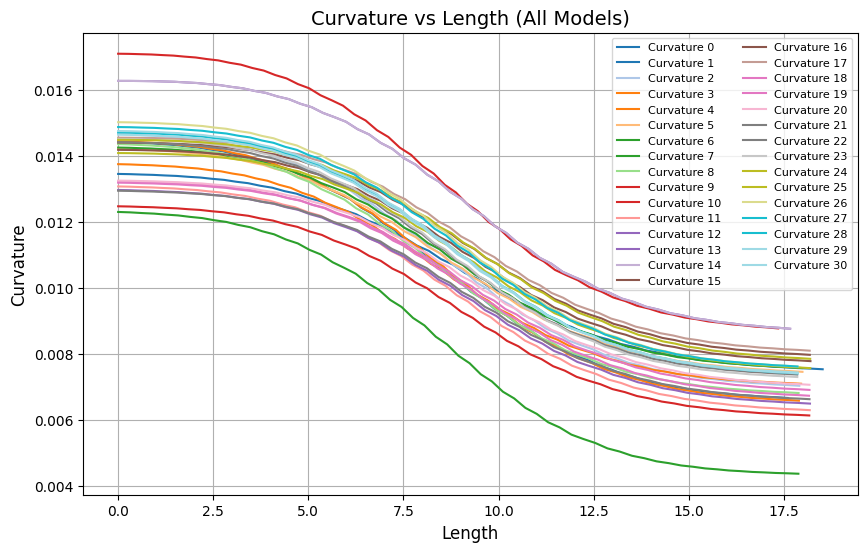

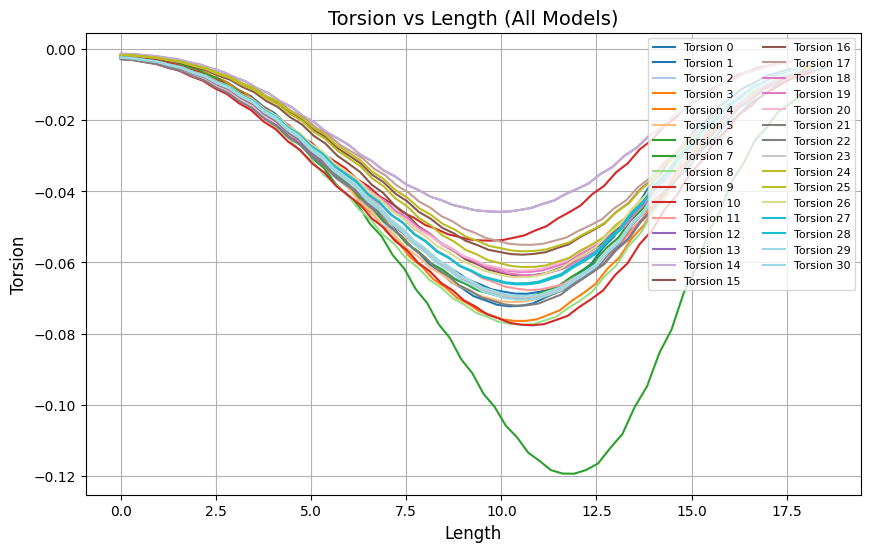

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load the data
latest_excel_file_path = 'centerline_comparsion.xlsx'  # Replace with your file path
latest_sheet_data = pd.read_excel(latest_excel_file_path, sheet_name='Sheet1')

# Extract curvature and torsion columns
curvature_columns = [col for col in latest_sheet_data.columns if 'curvature' in str(col)]
torsion_columns = [col for col in latest_sheet_data.columns if 'torsion' in str(col)]

# Define a colormap for unique colors
curvature_colors = cm.get_cmap('tab20', len(curvature_columns))  # Adjust the number of colors
torsion_colors = cm.get_cmap('tab20', len(torsion_columns))

# Plot curvature vs length with unique colors
plt.figure(figsize=(10, 6))
for i, col in enumerate(curvature_columns):
    length_col = f'length_{i}'
    if col in latest_sheet_data.columns and length_col in latest_sheet_data.columns:
        plt.plot(
            latest_sheet_data[length_col],
            latest_sheet_data[col],
            label=f'Curvature {i}',
            color=curvature_colors(i)
        )
plt.title('Curvature vs Length (All Models)', fontsize=14)
plt.xlabel('Length', fontsize=12)
plt.ylabel('Curvature', fontsize=12)
plt.legend(fontsize=8, loc='upper right', ncol=2)
plt.grid(True)
plt.show()

# Plot torsion vs length with unique colors
plt.figure(figsize=(10, 6))
for i, col in enumerate(torsion_columns):
    length_col = f'length_{i}'
    if col in latest_sheet_data.columns and length_col in latest_sheet_data.columns:
        plt.plot(
            latest_sheet_data[length_col],
            latest_sheet_data[col],
            label=f'Torsion {i}',
            color=torsion_colors(i)
        )
plt.title('Torsion vs Length (All Models)', fontsize=14)
plt.xlabel('Length', fontsize=12)
plt.ylabel('Torsion', fontsize=12)
plt.legend(fontsize=8, loc='upper right', ncol=2)
plt.grid(True)
plt.show()
